# Homework 1 - Brian Davidson

To test the functions for problems 1 and 2, under the kernel menu select "Restart & Run All".  Then scroll to the bottom of this file to the section labeled "Try it out".  

To generate all of the figures used in my report, set `run_everything=True` in the following cell.  Warning, it takes a little over 1 hour to run everything on a MacBook Pro with M1 processor.

In [1]:
run_everything=False

## Problem 1

(35 points) A weighted coin with probability *p* of coming up heads is flipped repeatedly. You have some whole dollar amount of money that is less than a hundred dollars. At each time, you can choose to bet any whole dollar amount that is less than or equal to the amount you possess. If the coin comes up heads you double the amount you bet, and if it comes up tails you lose the entire amount you bet. Your goal is to accumulate \\$100  after that you retire. So there are two eventual outcomes – accumulate \\$100 (you win), or go bust (end up with \\$0 and lose).

The state is your capital $s \in \{0, 1, 2, . . . , 99, 100\}$. The actions are the amounts you may choose to bet. In state $s, a \in \{1, 2, . . . , s \}$. The states 0 and 100 represent terminal states, with rewards 0 and 1 respectively. The utility function is undiscounted, and non-terminal states have 0 utility.

You will solve the problem of how much to bet at any state using value iteration. Before you start, though, think about and answer one question: what does the value function for a state represent? Please make sure you know the answer to this question before you proceed!
Implement value iteration and solve for the optimal policy for $p = 0.25$, $p = 0.4$, and $p = 0.55$. Present your results for each case as two graphs, one showing the final value estimates as a function of the state and one showing the optimal policy (how much you should bet as a function of the state). Write down your interpretation of the forms of the optimal policies in these cases and explain the differences. You may want to check your tie-breaking policies if you see unusual behavior that is hard to explain in the context of the rest of the policy (although, fair warning, some of the policies themselves may look surprising initially!)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


random.seed(687)


This is just testing my intuition prior to implementing value iteration...

The expected value of a single bet is
$$
\begin{align}
\mathbb{E}(bet) & = & p\cdot x + (1-p)\cdot(-x)\\
 & = & p\cdot x - x + p\cdot x\\
 & = & 2\cdot p\cdot x - x\\
 & = & (2\cdot p - 1)x
\end{align}
$$

When $p < \frac{1}{2}$ we expect to lose money.  So we expect to lose more often than we win for both the $p = 0.25$ case and $p = 0.4$ case.

My guess is that we want to bet the maximum amount for $p=0.25$ and $p=0.4$, and bet $\$1$ at a time when $p>0.5$.  To win in the first two cases we need to get lucky.  We're far more likely to get lucky 1 time than we are to get lucky 2 or 3 times in a row.  Betting as few times as possible should maximize our chances of winning.

When $p>0.5$, we don't want to risk a lot on a single bet.  It's better to make a lot of small bets, as we will win most of them (most of the time).

## Testing my initial hypothesis

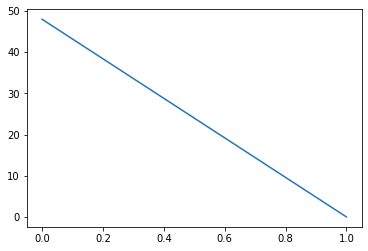

27.5


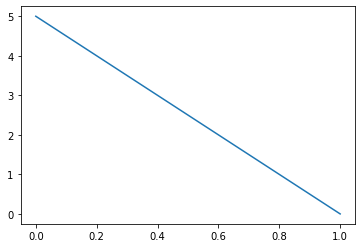

40.2


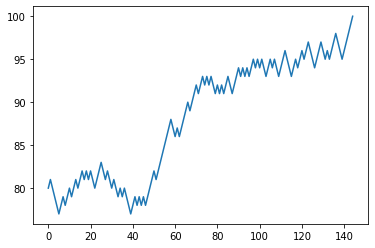

94.2


In [3]:
class Gambler(object):
    def __init__(self, cash = None, probability=0.25):
        self.probability = probability
        if cash is None:
            self.cash = random.randint(1,99)
        else:
            self.cash = cash
    def bet(self, wager):
        if random.random() < self.probability:
            self.cash += wager
        else:
            self.cash -= wager
    def get_cash(self):
        return self.cash
    def get_actions(self):
        top = min(100-self.cash, self.cash)
        actions = [*range(1,top+1,1)]
        return(actions)
    
gambler = Gambler(probability=.25)
mycash = []
mycash.append(gambler.get_cash())
#print(f"{gambler.get_cash()} {gambler.get_actions()}")

sum25 = []
for ii in range(1000):
    gambler = Gambler(probability=.25)

    mycash = []
    mycash.append(gambler.get_cash())
    while gambler.get_cash() < 100 and gambler.get_cash() > 0:    
        gambler.bet(max(gambler.get_actions()))
        mycash.append(gambler.get_cash())
        #print(f"{gambler.get_cash()} {gambler.get_actions()}")
    sum25.append(gambler.get_cash())
plt.plot(mycash)
plt.show()
#print(sum25)
print(sum(sum25)/len(sum25))

sum40 = []
for ii in range(1000):
    gambler = Gambler(probability=.4)
    mycash = []
    mycash.append(gambler.get_cash())
    while gambler.get_cash() < 100 and gambler.get_cash() > 0:    
        gambler.bet(max(gambler.get_actions()))
        mycash.append(gambler.get_cash())
    sum40.append(gambler.get_cash())

plt.plot(mycash)
plt.show()
#print(sum40)
print(sum(sum40)/len(sum40))

sum55 = []
for ii in range(1000):
    gambler = Gambler(probability=.55)
    mycash = []
    mycash.append(gambler.get_cash())
    while gambler.get_cash() < 100 and gambler.get_cash() > 0:    
        gambler.bet(1)
        mycash.append(gambler.get_cash())
    sum55.append(gambler.get_cash())
plt.plot(mycash)
plt.show()
#print(sum55)
print(sum(sum55)/len(sum55))



$$
R(s) = \begin{cases}
1 & \text{when } s=100\\
0 & \text{otherwise}
\end{cases}
$$

$$
\gamma = 1.0
$$

$$
U_{i+1}(s) = R(s) + \gamma \max_{a\in A(s)} \sum_{s'}P(s'|s,a)U_i(s')
$$

In [4]:
from matplotlib.ticker import MaxNLocator

def actions(state):
    top = min(100-state, state)
    actions = [*range(1,top+1,1)]
    return(actions)

def R(state):
    r=0
    if state == 100:
        r =100
    return r


def value_iteration(p):
    U = np.random.random_sample(101)
    #U = np.ones(101)
    #U = np.zeros(101)
    U[100] = 1
    U[0] = 0
    all_values = []
    all_values.append(U.copy())
    total_iterations = 0
    for ii in range(100000):
        U_new = np.zeros(101)
        U_new[100] = 1
        for s in [*range(1,100,1)]:
            r = R(s)
        
            best_a = 0
            best_val = -999999.0
            for a in actions(s):
                val = p*U[s+a] + (1-p)*U[s-a]
                if val > best_val:
                    best_a = a
                    best_val = val
            U_new[s] = r + best_val
        if np.array_equal(U, U_new):
            print(f"converged after {ii} iterations")
            total_iterations=ii
            break
        U = U_new
        all_values.append(U.copy())
    return U, all_values, total_iterations
#print(U)


def compute_policy(U, p, debug=[]):
    pol = np.zeros((101,), dtype=int)

    if (len(debug) > 0):
        print(f"{U}")
    for s in [*range(1,100,1)]:
        best_a = 0
        best_val = -999999.0
        for a in actions(s):
            val = p*U[s+a] + (1-p)*U[s-a]
            if (s in debug):
                print(f"action {a}: {p}*{U[s+a]} + (1-{p})*{U[s-a]} = {val}")
            if val >= best_val:
                best_a = a
                best_val = val
        pol[s] = best_a
        if (s in debug):
            print(f"pol[{s}] = {best_a}")
    return pol

def gamble(pol, p, U, iterations=1000):
    winning = []
    for starting_cash in range(100):
        sum40 = []
        for ii in range(iterations):
    
            gambler = Gambler(cash = starting_cash, probability=p)
            mycash = []
            mycash.append(gambler.get_cash())
            while gambler.get_cash() < 100 and gambler.get_cash() > 0:    
                gambler.bet(pol[gambler.get_cash()])
                mycash.append(gambler.get_cash())
            sum40.append(gambler.get_cash())

        print(f"{starting_cash}\t{sum(sum40)/len(sum40)} {U[starting_cash]*100}")

        winning.append(sum(sum40)/len(sum40))
    return winning



In [5]:
if run_everything:
    p = .25
    U, all_values, num_iterations = value_iteration(p)
    pol = compute_policy(U, p)

    print(pol)

    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Iteration #")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values, aspect='auto', cmap=mpl.colormaps['Spectral'])
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('AllValues_25.pdf', format='pdf')

    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(U)
    ax.set_ylabel("U*(s) (value of being in state)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Value_25.pdf', format='pdf')


    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylim(0,50)
    ax.plot(pol, 'b*')
    ax.set_ylabel("action ($ to bet)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Policy_25.pdf', format='pdf')


    p = .4
    U, all_values, num_iterations = value_iteration(p)
    pol = compute_policy(U,p)

    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Iteration #")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values, aspect='auto', cmap=mpl.colormaps['Spectral'])
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('AllValues_4.pdf', format='pdf')


    print(pol)

    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(U)
    ax.set_ylabel("U*(s) (value of being in state)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Value_4.pdf', format='pdf')


    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylim(0,50)
    ax.plot(pol)
    ax.set_ylabel("action ($ to bet)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Policy_4.pdf', format='pdf')


    p = .55
    U, all_values, num_iterations = value_iteration(p)
    pol = compute_policy(U,p)

    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Iteration #")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values, aspect='auto', cmap=mpl.colormaps['Spectral'])
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('AllValues_55.pdf', format='pdf')

    print(U)
    print(pol)

    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(U)
    ax.set_ylabel("U*(s) (value of being in state)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Value_55.pdf', format='pdf')


    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylim(0,50)
    ax.plot(pol, 'b*')
    ax.set_ylabel("action ($ to bet)")
    ax.set_xlabel("$ (the states)")
    plt.savefig('Policy_55.pdf', format='pdf')

## Investigating why so many iterations for p=.55

The idea is to run value iteration on all values of $p$ from $.01$ to $1.0$ in increments of $.01$ and take a look at the graph.  My hypothesis is that it takes many more iterations for values of $p$ that are close to $.5$.

In [6]:
if run_everything:
    iterationlist = []
    for testp in range(100):
        tmp, ignore, num_iterations = value_iteration((testp+1)/100)
        print(f"{(testp+1)/100} {num_iterations}")
        iterationlist.append(((testp+1)/100,num_iterations))


    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    plt.plot(*zip(*iterationlist))
    ax.set_ylabel("# iterations")
    ax.set_xlabel("p")
    plt.savefig('ptoiterations.pdf', format='pdf')


## problem 2
(35 points) Implement three different algorithms for multi-armed Bernoulli bandits: the greedy algorithm, UCB1, and Thompson Sampling. You should write a function for each of the three, which takes as input (1) a vector containing the probabilities with which each arm gives a payoff of 1, and (2) the number of iterations to run for. Test your algorithms on two different settings: (1) an eleven-armed bandit with payoff probabilities $0,0.1,0.2,\dots,1.0$, and (2) a five-armed bandit with payoff probabilities $0.3, 0.5, 0.7, 0.83, 0.85$.

Use these test cases to analyze the empirical properties of these algorithms, at least in terms of regret over time and probability of choosing the best action over time. Minimally, you should present a graph of average regret vs. time for each of the algorithms, and some kind of visualization of which action they are choosing over time. Be sure to label your axes and caption your figures appropriately. I would suggest trying the algorithms with at least $10^3$, $10^4$, $10^5$ time steps, and also re-running them from the start many times and averaging (so, for example, run the experiment with $10^3$ time steps several hundred times). What do your results tell you about the properties of these three different algorithms?

On this question in particular, I urge you to experiment and also present and write up any other interesting insights you may have (for example, playing with different probability vectors or different ways of analyzing the data).

$$
\bar{x}_j = \frac{k}{k+1}\bar{x}_j + \frac{1}{k+1}x_j
$$
$$
k = k+1
$$

where $x_j$ is the sample.

In [7]:
class Bandit(object):
    def __init__(self, p=None):
        if p is None:
            self.p = random.uniform(0,1)
        else:
            self.p = p
    def pull_arm(self):
        if random.uniform(0,1) < self.p:
            return 1
        else:
            return 0
    def get_probability(self):
        return self.p

class Greedy_bandits(object):
    def __init__(self, probabilities , iterations=1000):
        self.iterations=iterations
        self.bandits = [Bandit(p=prob) for prob in probabilities]
        self.p = probabilities.copy()
        
        #random.shuffle(self.bandits)
        # Keep track of how many times each arm has been pulled
        self.numPulls = np.zeros(len(probabilities), dtype=int)
        
        # Keep track of the rewards earned for each arm
        self.rewards = np.zeros(len(probabilities))
        
        # value[arm] = rewards[arm]/numPulls[arm]
        self.values = np.zeros(len(probabilities))
        
        self.not_initialized = [*range(0,len(self.bandits),1)]


    def run(self):
        result = 0
        actions = []
        regret = []
        not_initialized = [*range(len(self.bandits))]
        mu = 0
        for ii in range(self.iterations):
            if (len(not_initialized) > 0):
                bestAction = not_initialized.pop()
            else:
                bestAction = np.argmax(self.values)
            tmp = self.bandits[bestAction].pull_arm()
            actions.append(bestAction)
            self.rewards[bestAction] += tmp
            result += tmp
            self.numPulls[bestAction] += 1
            self.values[bestAction] = self.rewards[bestAction]/self.numPulls[bestAction]
            mu += self.p[bestAction]
            # Regret is expected best value - expected value from chosen bandit
            regret.append(max(self.p)*ii - mu)
        
        return result, actions, regret
        
    def __str__(self):
        result = ""
        #result += "bandit\tp\treward\tnumPulls\n"
        total = 0
        totalPulls = 0
        for ii, reward in enumerate(self.rewards):
            total += reward
            #result += f"{ii}\t{self.bandits[ii].get_probability()}\t{reward}\t{self.numPulls[ii]}\n"
            totalPulls += self.numPulls[ii]
        result += f"Reward {total} / Total # Pulls: {totalPulls} = {total / totalPulls}"
        return result
    
    def get_reward(self):
        result = 0
        for ii, reward in enumerate(self.rewards):
            result += reward
        return result
        



In [8]:
if run_everything:
    iterations = 1000
    probabilities = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    results = []
    actionlists = []
    regretlist = []
    for i in range(iterations):
        greedy = Greedy_bandits(probabilities = probabilities, iterations=100000)
    
        result, actions, regret = greedy.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('greedy-regret1.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_greedy1.pdf', format='pdf')
    
    
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("iteration #")
    ax.ticklabel_format(useOffset=False)
    plt.savefig('greedy1.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.ticklabel_format(useOffset=False)
    ax.hist(results, bins='auto')
    plt.savefig('greedy1-histo.pdf', format='pdf')
    
    
    probabilities = [0.3,0.5,0.7,0.83,0.85]
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(iterations):
        greedy = Greedy_bandits(probabilities = probabilities, iterations=100000)
        result, actions, regret = greedy.run()
        regretlist.append(regret)
        results.append(result)
        actionlists.append(actions)
    
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('greedy-regret2.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_greedy2.pdf', format='pdf')
    
    
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("run #")
    ax.ticklabel_format(useOffset=False)
    plt.savefig('greedy2.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.ticklabel_format(useOffset=False)
    ax.hist(results, bins='auto')
    plt.savefig('greedy2-histo.pdf', format='pdf')


## Upper Confidence Bound

$$
\text{argmax}_j \bar{x}_j + \sqrt{\frac{2\ln n}{n_j}}
$$

In [9]:
class UCB1_bandits(object):
    def __init__(self, probabilities , iterations=1000):
        self.iterations=iterations
        self.bandits = [Bandit(p=prob) for prob in probabilities]
        self.p = probabilities.copy()
        
        # Keep track of how many times each arm has been pulled
        self.numPulls = np.zeros(len(probabilities), dtype=int)
        
        # Keep track of the rewards earned for each arm
        self.rewards = np.zeros(len(probabilities))
        
        self.totalPulls = 0

    def run(self):
        result = 0
        actions = []
        regret = []
        mu = 0
        for ii in range(self.iterations):
            bestValue = 0
            bestAction = 0
            for k, num_pulls in enumerate(self.numPulls):
                if (self.numPulls[k] == 0):
                    bestAction = k
                    break
                tmp_x = self.rewards[k]/self.numPulls[k] + np.sqrt(2*np.log(self.totalPulls)/self.numPulls[k])
                if tmp_x > bestValue:
                    bestValue = tmp_x
                    bestAction = k
            tmp = self.bandits[bestAction].pull_arm()
            actions.append(bestAction)
            self.rewards[bestAction] += tmp
            result += tmp
            self.numPulls[bestAction] += 1
            self.totalPulls += 1
            
            mu += self.p[bestAction]
            
            # Regret is expected best value - expected value from chosen bandit
            regret.append(max(self.p)*ii - mu)
        
        return result, actions, regret
        
    def __str__(self):
        result = ""
        #result += "bandit\tp\treward\tnumPulls\n"
        total = 0
        totalPulls = 0
        for ii, reward in enumerate(self.rewards):
            total += reward
            #result += f"{ii}\t{self.bandits[ii].get_probability()}\t{reward}\t{self.numPulls[ii]}\n"
            totalPulls += self.numPulls[ii]
        result += f"Reward {total} / Total # Pulls: {totalPulls} = {total / totalPulls}"
        return result
    
    def get_reward(self):
        result = 0
        for ii, reward in enumerate(self.rewards):
            result += reward
        return result
        


In [10]:
if run_everything:
    probabilities = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    iterations=1000
    
    results = []
    actionlists = []
    regretlist = []
    for i in range(iterations):
        ucb1 = UCB1_bandits(probabilities = probabilities, iterations=100000)
    
        result, actions, regret = ucb1.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('ucb-regret1.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_ucb1.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("iteration #")
    plt.savefig('ucb1.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.hist(results, bins='auto')
    plt.savefig('ucb1-histo.pdf', format='pdf')
    
    
    probabilities = [0.3,0.5,0.7,0.83,0.85]
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(iterations):
        ucb1 = UCB1_bandits(probabilities = probabilities, iterations=100000)
        result, actions, regret = ucb1.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('ucb-regret2.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_ucb2.pdf', format='pdf')
    
    fig = plt.figure(figsize=(24, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("iteration #")
    plt.savefig('ucb2.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.hist(results, bins='auto')
    plt.savefig('ucb2-histo.pdf', format='pdf')


## Thompson Sampling

Maintain a belief over ($p_1, p_2,\dots,p_k$)

At each step:
- sample a mean reward vector based on current belief
- choose arm with highest mean & update

Use Beta function, $\alpha$ is the number of "wins" and $\beta$ is the number of losses.  The PDF is:

$$
PDF = \frac{x^{\alpha - 1}(1-x)^{\beta - 1}}{\beta(\alpha, \beta)}\\
\beta(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(2 + \beta)}\\
\Gamma(n) = (n-1)!
$$

Unrolling that:

$$
\frac{x^{\alpha - 1}(1-x)^{\beta - 1}}{\frac{(\alpha-1)!(\beta-1)!}{(\beta + 1)!}}\\
= \frac{(\beta - 1)!\cdot x^{\alpha - 1}(1-x)^{\beta - 1}}{(\alpha-1)!(\beta-1)!}
$$

The mean is:

$$
\frac{\alpha}{\alpha + \beta}
$$

which is just the number of wins divided by the total number of tries.  Except we're initializing $\alpha$ and $\beta$ to $1$.


### BernTS($K, \alpha, \beta$)

```
for t = 1,2,... do
    # sample model:
    for k=1,...,K do
        Sample theta_k ~ beta(a_k, b_k)
    end for
    
    # select and apply action
    x_t = argmax_k theta_k
    Apply x_t and observe r_t
    
    # update distribution
    (a_x_t, b_x_t) = (x_x_t + r_t, b_x_t + 1 - r_t)
end for
```
Some things to show:

- selection of actions over time
    - see page 16 of *A Tutorial on Thompson Sampling*
- regret over time
    - see page 17 of *A Tutorial on Thompson Sampling*

In [11]:
class beta(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
        

class BernTS_bandits(object):
    def __init__(self, probabilities , iterations=1000):
        self.iterations=iterations
        self.bandits = [Bandit(p=prob) for prob in probabilities]
        self.p = probabilities.copy()
        # Keep track of how many times each arm has been pulled
        self.numPulls = np.zeros(len(probabilities), dtype=int)
        
        # Keep track of the rewards earned for each arm
        self.rewards = np.zeros(len(probabilities))
        
        # value[arm] = rewards[arm]/numPulls[arm]
        self.values = np.zeros(len(probabilities))
        
        self.betas = [beta(1,1) for prob in probabilities]
        
    def run(self):
        result = 0
        actions = []
        regret = []
        mu = 0
        for ii in range(self.iterations):
            bestValue = 0
            bestAction = 0
            for k, beta_k in enumerate(self.betas):
                tmp_x = np.random.beta(beta_k.a, beta_k.b)
                if tmp_x > bestValue:
                    bestValue = tmp_x
                    bestAction = k
            tmp = self.bandits[bestAction].pull_arm()
            actions.append(bestAction)
            self.rewards[bestAction] += tmp
            result += tmp
            self.betas[bestAction].a += tmp
            self.betas[bestAction].b += 1-tmp
            self.numPulls[bestAction] += 1
            mu += self.p[bestAction]
            regret.append(max(self.p)*ii - mu)
        
        return result, actions, regret
        
    def __str__(self):
        result = ""
        #result += "bandit\tp\treward\tnumPulls\n"
        total = 0
        totalPulls = 0
        for ii, reward in enumerate(self.rewards):
            total += reward
            #result += f"{ii}\t{self.bandits[ii].get_probability()}\t{reward}\t{self.numPulls[ii]}\n"
            totalPulls += self.numPulls[ii]
        result += f"Reward {total} / Total # Pulls: {totalPulls} = {total / totalPulls}"
        return result
    
    def get_reward(self):
        result = 0
        for ii, reward in enumerate(self.rewards):
            result += reward
        return result
        


In [12]:
if run_everything:
    probabilities = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    iterations = 1000
    
    results = []
    actionlists = []
    regretlist = []
    for i in range(iterations):
        greedy = BernTS_bandits(probabilities = probabilities, iterations=100000)
    
        result, actions, regret = greedy.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('bernts-regret1.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_bernts1.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("iteration #")
    plt.savefig('bernts1.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.hist(results, bins='auto')
    plt.savefig('bernts1-histo.pdf', format='pdf')
    
    
    probabilities = [0.3,0.5,0.7,0.83,0.85]
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(iterations):
        greedy = BernTS_bandits(probabilities = probabilities, iterations=100000)
        result, actions, regret = greedy.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    plt.savefig('bernts-regret2.pdf', format='pdf')
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('Actions_bernts2.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(results)
    ax.set_ylabel("$ winnings")
    ax.set_xlabel("iteration #")
    plt.savefig('bernts2.pdf', format='pdf')
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylabel("# runs")
    ax.set_xlabel("$ winnings")
    ax.hist(results, bins='auto')
    plt.savefig('bernts2-histo.pdf', format='pdf')

## problem 3
(10 points; based on AIMA 16.3) The St. Petersburg paradox goes as follows. A fair coin is tossed repeatedly until it comes up heads. If the first heads appears on the nth toss, you win $ \$2^n$. First, show that the expected monetary value of this game is infinite (the paradox is that no one would actually pay a huge amount to play this game). Second, consider a possible resolution of the paradox: suppose your utility for money is given by $a \log_2 x + b$ where $x$ is the number of dollars you have. Suppose you start with 0 dollars, what is the expected utility of this game?

The probability of winning in $n$ turns is 

$$
\Big(\frac{1}{2}\Big)^n
$$

There are $(n-1)$ tails followed by 1 heads.  Each coin flip has a probability $\frac{1}{2}$ of being tails (or heads).  


$$
\begin{align}
\mathbb{E}(X) & = & \sum_{n=1}^{\infty} \Big(\frac{1}{2}\Big)^n\cdot 2^n\\
& = & \infty
\end{align}
$$

The exponential growth of the reward, combined with a potentially infinite sequence leads to an infinite expected value.  Using a utility function that grows linearly instead of exponentially 

If we define $ U(x) = log_2(x)$

$$
\begin{align}
\mathbb{E}[U(x)] & = & \sum_{n=1}^{\infty}\Big(\frac{1}{2}\Big)^n \cdot \log_2(2^n)\\
& = & \sum_{n=1}^{\infty}\Big(\frac{1}{2}\Big)^n\cdot n\\
& = & \sum_{n=1}^{\infty}\frac{n}{2^n}\\
& = & \frac{1}{2} + \frac{2}{2^2} + \frac{3}{2^3} + \frac{4}{2^4} + \frac{5}{2^5} + \frac{6}{2^6} + \cdots\\
& = & \frac{1}{2} + \frac{1}{2^2} + \frac{1}{2^2} + \frac{1}{2^3} + \frac{2}{2^3} + \frac{1}{2^4} + \frac{3}{2^4} + \frac{1}{2^5} + \frac{4}{2^5} + \frac{1}{2^6} + \frac{5}{2^6} + \cdots\\
& = & \Big(\frac{1}{2} + \frac{1}{2^2} + \frac{1}{2^3}  + \frac{1}{2^4} + \frac{1}{2^5}  + \frac{1}{2^6} + \cdots\Big) + \Big( \frac{1}{2^2} + \frac{2}{2^3} + \frac{3}{2^4} + \frac{4}{2^5} + \frac{5}{2^6} + \cdots\Big )\\
\mathbb{E}[U(x)] & = & \Big(\frac{1}{2} + \frac{1}{2^2} + \frac{1}{2^3}  + \frac{1}{2^4} + \frac{1}{2^5}  + \frac{1}{2^6} + \cdots\Big) + \frac{1}{2}\cdot\Big( \frac{1}{2} + \frac{2}{2^2} + \frac{3}{2^3} + \frac{4}{2^4} + \frac{5}{2^5} + \cdots\Big )\\
\mathbb{E}[U(x)] & = & \Big(\frac{1}{2} + \frac{1}{2^2} + \frac{1}{2^3}  + \frac{1}{2^4} + \frac{1}{2^5}  + \frac{1}{2^6} + \cdots\Big) + \frac{1}{2}\mathbb{E}[U(x)]\\
\frac{1}{2}\mathbb{E}[U(x)] & = & \Big(\frac{1}{2} + \frac{1}{2^2} + \frac{1}{2^3}  + \frac{1}{2^4} + \frac{1}{2^5}  + \frac{1}{2^6} + \cdots\Big)\\
\mathbb{E}[U(x)] & = & 2\cdot \frac{1}{1-\frac{1}{2}}\\
& = & 4
\end{align}
$$

In [13]:
def U(s):
    return 1*np.log2(s)

def P(s):
    return (np.float_power(.5,s))

for i in range(1,50,1):
    cash = np.float_power(2,i)
    print(f"{i}\t{cash}\t{P(i)}\t{U(cash)}\t{P(i)*U(cash)}")


1	2.0	0.5	1.0	0.5
2	4.0	0.25	2.0	0.5
3	8.0	0.125	3.0	0.375
4	16.0	0.0625	4.0	0.25
5	32.0	0.03125	5.0	0.15625
6	64.0	0.015625	6.0	0.09375
7	128.0	0.0078125	7.0	0.0546875
8	256.0	0.00390625	8.0	0.03125
9	512.0	0.001953125	9.0	0.017578125
10	1024.0	0.0009765625	10.0	0.009765625
11	2048.0	0.00048828125	11.0	0.00537109375
12	4096.0	0.000244140625	12.0	0.0029296875
13	8192.0	0.0001220703125	13.0	0.0015869140625
14	16384.0	6.103515625e-05	14.0	0.0008544921875
15	32768.0	3.0517578125e-05	15.0	0.000457763671875
16	65536.0	1.52587890625e-05	16.0	0.000244140625
17	131072.0	7.62939453125e-06	17.0	0.00012969970703125
18	262144.0	3.814697265625e-06	18.0	6.866455078125e-05
19	524288.0	1.9073486328125e-06	19.0	3.62396240234375e-05
20	1048576.0	9.5367431640625e-07	20.0	1.9073486328125e-05
21	2097152.0	4.76837158203125e-07	21.0	1.0013580322265625e-05
22	4194304.0	2.384185791015625e-07	22.0	5.245208740234375e-06
23	8388608.0	1.1920928955078125e-07	23.0	2.7418136596679688e-06
24	16777216.0	5.9604644775390

## problem 4
(10 points; based on AIMA 16.17) You are considering buying a used car, which is being offered for \\$1500. It is worth \\$2000 to you if it is in good shape, and \\$1300 if it is in bad shape. There is a 70\% chance that it is in good shape. Your decision is simple: buy the car, or don’t. But, as you’re examining it, a mechanic you know and trust drives by and sees you looking at the car. He tells you that he has a quick test he can do: if the car is in good shape, there is an 80\% chance that it will pass the test, and if the car is in bad shape, there is only a 35\% chance that it will pass the test. How much would you be willing to pay the mechanic to undertake the test? Give an explanation in layman’s terms of why the value of information in this case comes out to what it does.

## problem 5
(10 points; based on AIMA 17.10) Consider an undiscounted MDP with three states, (1, 2, 3) with rewards −1, −2, 0 respectively, and state 3 as a terminal state. In states 1 and 2, there are two possible actions, a and b. The transition model is as follows:

- In state 1, $a$ transitions to state 2 with probability $0.8$ and stays in state 1 with probability $0.2$.
- In state 2, $a$ transitions to state 1 with probability $0.8$ and stays in state 2 with probability $0.2$.
- In either state 1 or state 2, $b$ transitions to state 3 with probability $0.1$ and stays in the original state with probability $0.9$.

Answer the following questions:

(a) Before doing any math, what can you say qualitatively about the optimal policy in states 1 and 2?

(b) Apply policy iteration, starting with the policy that takes action b in both states, to determine the optimal policy and the values of states 1 and 2. Show each step in full.

(c) Repeat part (b), but starting with the policy that takes action a in both states. What is the problem here? Does discounting help? How does the discount factor affect the optimal policy?

In [14]:
from matplotlib.ticker import MaxNLocator

states = [ 0, 1, 2]
rewards = [ -1, -2, 0]
def transition_probabilities(s, a):
    if (a=='a'):
        action = 0
    if (a=='b'):
        action = 1
    T=[[[0.2, 0.8, 0], [0.9, 0, 0.1]],
       [[0.8, 0.2, 0], [0, 0.9, 0.1]],
       [[0 ,0,1], [0,0,1]]]
    return T[s][action]

def evaluate_policy(states, T, policy, rewards, gamma=.99999):
    P = np.zeros((len(states), len(states)))
    for i in states:
        tprob = T(i, policy[i])
        for j in range(len(tprob)):
            P[i,j] = tprob[j]
    I = np.eye(len(states))
    print(f"policy: ${policy}")
    print(f"${I} - ${gamma}${P}")
    A=np.subtract(I, gamma*P)
    print(f"${A}U = ${rewards}")
    U = np.linalg.solve(A, rewards)
    print(f"U = ${U}")
    return U

def policy_iteration(states, T, rewards, startingpolicy, num_iterations, gamma=0.99999):
    values = rewards.copy()
    all_values = []
    all_values.append(values.copy())
    
    all_policies = []
    all_policies.append(startingpolicy.copy())
    # Get random policy
    policy = startingpolicy.copy()
    
    for ii in range(num_iterations):        
        values = evaluate_policy(states, T, policy, rewards, gamma)
        all_values.append(values.copy())
        # print(f"policy iteration - iteration {ii}")
        # Update the policy
        
        newPolicy = policy.copy()
        for state in states:
            maxValue = -9999999999
            bestAction = -1
            actions = ["a", "b"]
            for action in actions:
                t = T(state, action)
                runningValue = 0.0
                print(f"compute value of taking action ${action}$ in state {state + 1}\\\\")
                for new_state, p_state in enumerate(t):
                    print(f"  ${state+1}\mapsto {new_state + 1}$ case: runningValue += \\\\")
                    print(f"${p_state}\cdot({rewards[new_state]} + {gamma}\cdot{values[new_state]})$\\\\")
                    print(f"$= {p_state*(rewards[new_state] + gamma*values[new_state])}$\\\\")
                    runningValue += p_state*(rewards[new_state] + gamma*values[new_state])
                print(f"runningValue for ${state+1}$, ${action}$ is {runningValue}\\\\")                                                                                                         
                if runningValue > maxValue:
                    maxValue = runningValue
                    bestAction = action
            newPolicy[state] = bestAction
            print(f"  ${bestAction}$ is the new policy for state {state + 1}\\\\")
            
        # Terminate (break) if the policy does not change between steps

        if np.array_equiv(policy, newPolicy):
            break
        policy = newPolicy
        all_policies.append(policy.copy())
            
    return policy, all_values, all_policies



In [15]:
if run_everything:
    policy = ["b", "b", "b"]
    
    newpolicy, all_values, all_policies = policy_iteration(states, transition_probabilities, rewards, policy, 10000)
    print(newpolicy)
    
    print("All values:")
    print(all_values)
    print("All policies:")
    print(all_policies)
    
    
    
    plt.figure(figsize=(6, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Policy evaluation iteration")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values)
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    
    
    
    policy = ["a", "a", "a"]
    
    newpolicy, all_values, all_policies = policy_iteration(states, transition_probabilities, rewards, policy, 10000)
    print(newpolicy)
    
    print("All values:")
    print(all_values)
    print("All policies:")
    print(all_policies)
    
    
    plt.figure(figsize=(6, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Policy evaluation iteration")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values)
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    
    
    
    policy = ["a", "b", "b"]
    
    newpolicy, all_values, all_policies = policy_iteration(states, transition_probabilities, rewards, policy, 10000)
    print(newpolicy)
    
    print("All values:")
    print(all_values)
    print("All policies:")
    print(all_policies)
    
    
    plt.figure(figsize=(6, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Policy evaluation iteration")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values)
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    
    
    policy = ["b", "b", "b"]
    
    newpolicy, all_values, all_policies = policy_iteration(states, transition_probabilities, rewards, policy, 10000, gamma=.2)
    print(newpolicy)
    print("All values:")
    print(all_values)
    print("All policies:")
    print(all_policies)
    plt.figure(figsize=(6, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Policy evaluation iteration")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values)
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    
    policy = ["b", "b", "b"]
    
    newpolicy, all_values, all_policies = policy_iteration(states, transition_probabilities, rewards, policy, 10000, gamma=.999999999999)
    print(newpolicy)
    
    print("All values:")
    print(all_values)
    print("All policies:")
    print(all_policies)
    
    
    plt.figure(figsize=(6, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("Policy evaluation iteration")
    ax.set_xlabel("Values of states")
    plt.imshow(all_values)
    plt.colorbar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

### Functions to make it easier to use

In hindsight, should have created these and used them myself...

In [16]:
def policy_using_value_iteration(p):
    U, all_values, num_iterations = value_iteration(p)
    pol = compute_policy(U, p)

    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot(U)
    ax.set_ylabel("U*(s) (value of being in state)")
    ax.set_xlabel("$ (the states)")
    
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.set_ylim(0,50)
    ax.plot(pol, 'b*')
    ax.set_ylabel("action ($ to bet)")
    ax.set_xlabel("$ (the states)")
    
def bandit_greedy(probabilities=[0.3,0.5,0.7,0.83,0.85], iterations=1000, trials=10):
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(trials):
        bandit = Greedy_bandits(probabilities = probabilities, iterations=iterations)
    
        result, actions, regret = bandit.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    
    plt.figure(figsize=(24, 6))
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))        


def bandit_ucb1(probabilities=[0.3,0.5,0.7,0.83,0.85], iterations=1000, trials=10):
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(trials):
        bandit = UCB1_bandits(probabilities = probabilities, iterations=iterations)
    
        result, actions, regret = bandit.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
    
    
    result, actions, regret = bandit.run()
    results.append(result)
    regretlist.append(regret)
    actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    
    plt.figure(figsize=(24, 6))
    plt.title("Actions taken at each timestep")
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
    
def bandit_bernts(probabilities=[0.3,0.5,0.7,0.83,0.85], iterations=1000, trials=10):
    results = []
    actionlists = []
    regretlist = []
    
    for i in range(trials):
        bandit = BernTS_bandits(probabilities = probabilities, iterations=iterations)
    
        result, actions, regret = bandit.run()
        results.append(result)
        regretlist.append(regret)
        actionlists.append(actions)
    
    
    result, actions, regret = bandit.run()
    results.append(result)
    regretlist.append(regret)
    actionlists.append(actions)
        
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = plt.subplot(111)
    ax.plot([sum(x)/iterations for x in zip(*regretlist)])
    ax.set_ylabel("regret")
    ax.set_xlabel("iteration #")
    
    plt.figure(figsize=(24, 6))
    plt.title("Actions taken at each timestep")
    ax=plt.subplot(121)
    ax.set_ylabel("trial #")
    ax.set_xlabel("Timestep")
    plt.imshow(actionlists, aspect='auto', cmap=mpl.colors.ListedColormap(mpl.colormaps['Paired'].colors[:len(probabilities)]))
    cbar=plt.colorbar(label='Action', ticks=[*range(len(probabilities))])
    cbar.ax.set_yticklabels(map(str, probabilities))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  


## Try it out
In the code block below you can try out the following functions using data of your choosing.

### Problem 1

There is one function, `policy_using_value_iteration(p)` that takes a probability as an argument.
```
policy_using_value_iteration(.25)
```

### Problem 2

The 3 functions are called as follows:
```
bandit_greedy([0.3, 0.6, 0.7], 1000)
bandit_ucb1([0.3, 0.6, 0.7], 1000)
bandit_bernts([0.3, 0.6, 0.7], 1000)
```

There is an optional 3rd argument which is the number of trials to perform.  The default value is 10.

```
bandit_bernts([0.3, 0.6, 0.7], 1000, 100)
```

In [19]:
#policy_using_value_iteration(.25)
#bandit_greedy([0.3, 0.6, 0.7], 1000)
#bandit_ucb1([0.3, 0.6, 0.7], 1000)
#bandit_bernts([0.3, 0.6, 0.7], 1000)

# Example that provides a vector containing probabilities, 
# the number of iterations to run and runs 100 trials:
#
#bandit_bernts([0.3, 0.6, 0.7], 1000, 100)
